# Git Metrics Analysis and Extraction Using Machine Learning

In [1]:
!pip install pydriller pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 3.2 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/apache/hive.git

Cloning into 'hive'...
remote: Enumerating objects: 723286, done.
remote: Counting objects: 100% (798/798), done.
remote: Compressing objects: 100% (509/509), done.
remote: Total 723286 (delta 474), reused 290 (delta 289), pack-reused 722488 (from 3)
Receiving objects: 100% (723286/723286), 712.78 MiB | 28.41 MiB/s, done.
Resolving deltas: 100% (413628/413628), done.
Updating files: 100% (21376/21376), done.


In [3]:
!git --version

git version 2.25.1


In [4]:
!apt-get update
!apt-get install git

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]
Get:4 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:5 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]
Get:7 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [30.1 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [4157 kB]
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1600 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1587 kB]
Get:11 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3482 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [4227 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security

In [5]:
!git --version

git version 2.25.1


In [6]:
!pip install gitpython

In [7]:
from git import Repo
import pandas as pd

# آدرس ریپو دانلود شده
repo_path = "./hive"

# لیست برای ذخیره اطلاعات کامیت‌ها
commits_data = []

# باز کردن ریپو
repo = Repo(repo_path)

# استخراج اطلاعات کامیت‌ها
for commit in repo.iter_commits():
    commits_data.append({
        "hash": commit.hexsha,
        "author": commit.author.name,
        "date": commit.committed_datetime,
        "lines_added": commit.stats.total.get('insertions', 0),
        "lines_deleted": commit.stats.total.get('deletions', 0),
        "files_changed": len(commit.stats.files),
        "message": commit.message
    })

# تبدیل به DataFrame
df_commits = pd.DataFrame(commits_data)

# ذخیره به فایل CSV
df_commits.to_csv("hive_commits.csv", index=False)
print("اطلاعات کامیت‌ها ذخیره شد.")

اطلاعات کامیت‌ها ذخیره شد.


In [8]:
!ls ./hive

Jenkinsfile	   conf		  kafka-handler    serde
LICENSE		   contrib	  kudu-handler	   service
LICENSE-binary	   data		  lib		   service-rpc
NOTICE		   dev-support	  llap-client	   shims
README.md	   druid-handler  llap-common	   spotbugs
RELEASE_NOTES.txt  errata.txt	  llap-ext-client  standalone-metastore
accumulo-handler   hbase-handler  llap-server	   storage-api
beeline		   hcatalog	  llap-tez	   streaming
bin		   hplsql	  metastore	   testutils
checkstyle	   iceberg	  packaging	   udf
classification	   itests	  parser	   vector-code-gen
cli		   jdbc		  pom.xml
common		   jdbc-handler   ql


In [9]:
df_commits.head()

,hash,author,date,lines_added,lines_deleted,files_changed,message
0,20d26ad269af3c281f845df76d3b8d260cabc904,yu liang,2024-12-20 13:46:53+08:00,13,4,2,HIVE-28473:INSERT OVERWRITE LOCAL DIRECTORY wr...
1,f44e1beacb0d8f115c2a0b6d8c88088537aa2e15,Bodor Laszlo,2024-12-18 11:46:24+01:00,157,13,4,HIVE-28623: Implement RuntimeContext to decoup...
2,b22b218857636da11feecabd33e37371bad3e3a6,Venkatasubrahmanian Narayanan,2024-12-17 21:47:40+01:00,131,11,5,HIVE-28377: Add support for hive.output.file.e...
3,4898d7bfaa1437d39d25070e0ab63c5e0e0de9d7,dengzh,2024-12-13 08:47:30+08:00,4,4,1,HIVE-28662: Enable the dynamic leader election...
4,28baba24e9464bd46fc7bc22561f7851cbb3b390,Ling Hengqian,2024-12-13 01:03:44+05:30,17,7,3,HIVE-15540: Impl `DatabaseMetaData#getURL()` a...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

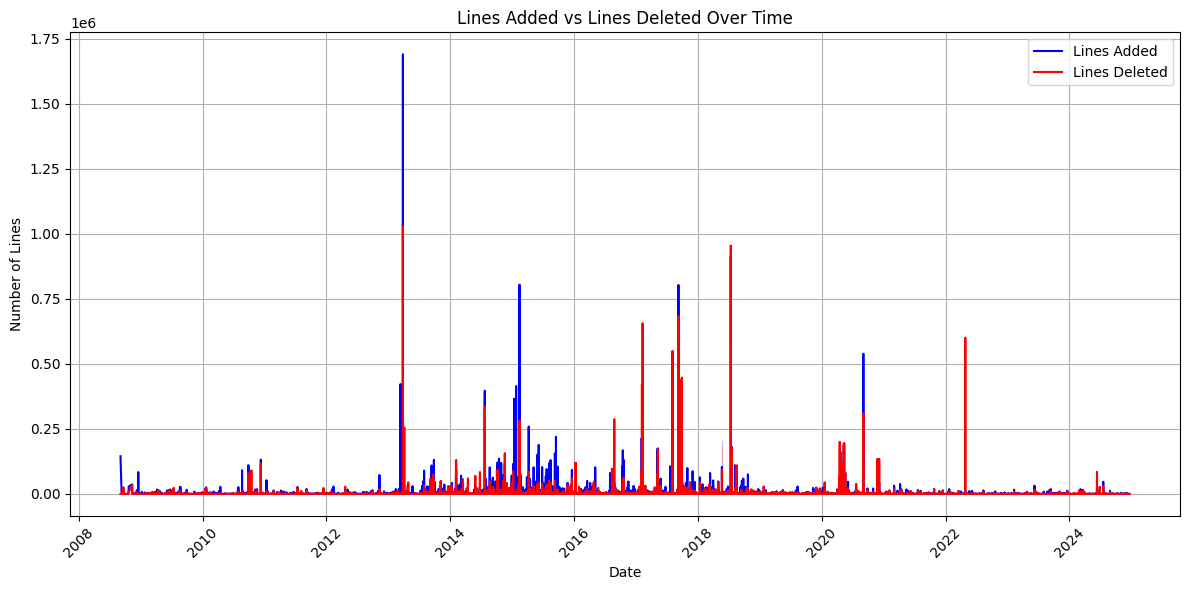

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


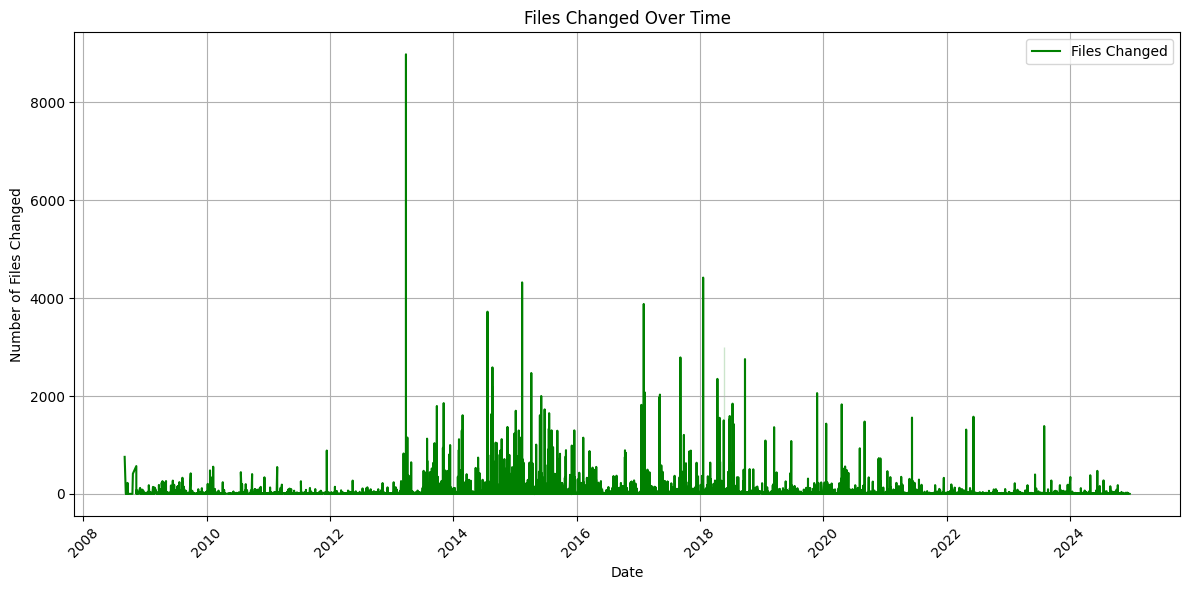

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل تاریخ به datetime و حذف منطقه زمانی
df_commits['date'] = pd.to_datetime(df_commits['date'], utc=True).dt.tz_localize(None)

# تجزیه و تحلیل داده‌ها: تعداد خطوط اضافه شده و حذف شده
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_commits, x='date', y='lines_added', label='Lines Added', color='blue')
sns.lineplot(data=df_commits, x='date', y='lines_deleted', label='Lines Deleted', color='red')
plt.title('Lines Added vs Lines Deleted Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Lines')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# تجزیه و تحلیل تعداد فایل‌های تغییر یافته در طول زمان
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_commits, x='date', y='files_changed', label='Files Changed', color='green')
plt.title('Files Changed Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Files Changed')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 33539 (\N{CJK UNIFIED IDEOGRAPH-8303}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 23452 (\N{CJK UNIFIED IDEOGRAPH-5B9C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 33275 (\N{CJK UNIFIED IDEOGRAPH-81FB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 20219 (\N{CJK UNIFIED IDEOGRAPH-4EFB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 20141 (\N{CJK UNIFIED IDEOGRAPH-4EAD}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/2457256580.py:9: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  plt.tight_layout()
/tmp/ipykerne

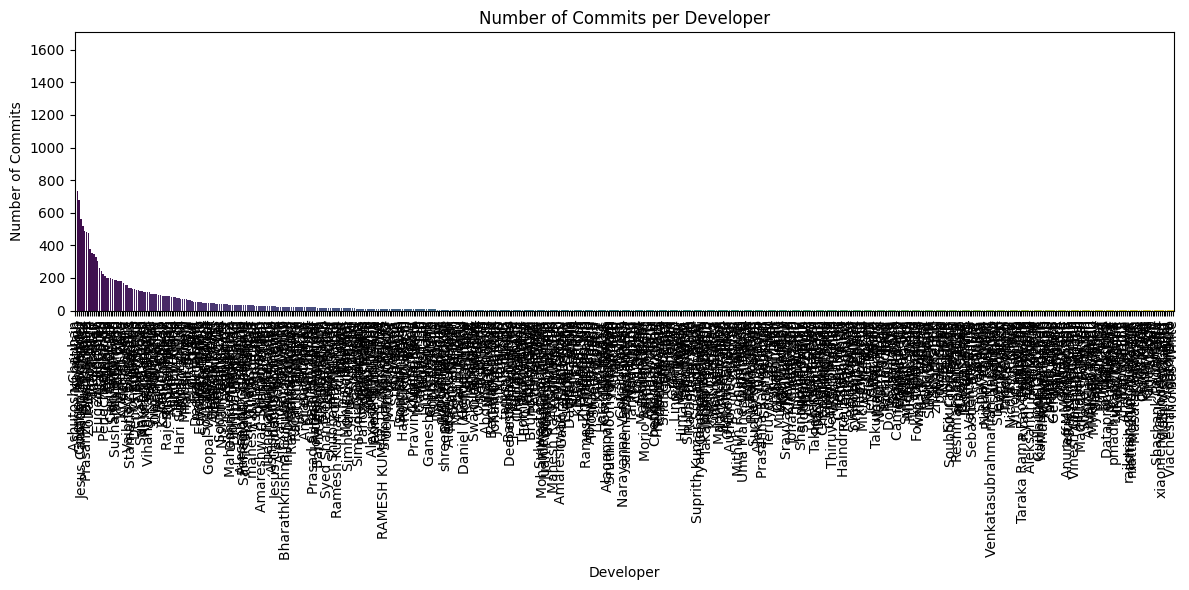

In [11]:
# تعداد کامیت‌ها توسط هر توسعه‌دهنده
plt.figure(figsize=(12, 6))
commit_counts = df_commits['author'].value_counts()
sns.barplot(x=commit_counts.index, y=commit_counts.values, palette='viridis')
plt.title('Number of Commits per Developer')
plt.xlabel('Developer')
plt.ylabel('Number of Commits')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ایجاد ویژگی‌ها
df_commits['day_of_week'] = df_commits['date'].dt.dayofweek
df_commits['month'] = df_commits['date'].dt.month

# ویژگی‌های ورودی و هدف
X = df_commits[['day_of_week', 'month', 'files_changed']]
y = df_commits['lines_added']

# تقسیم داده‌ها به داده‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مدل رگرسیون
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی و ارزیابی
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 333673577.32216394


In [13]:
# Add the Git PPA repository for the latest version
!add-apt-repository ppa:git-core/ppa -y

# Update the package list
!apt-get update

# Install the latest version of Git
!apt-get install git -y

# Verify the Git version
!git --version

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://ppa.launchpad.net/git-core/ppa/ubuntu focal InRelease [24.6 kB]
Hit:4 https://packages.cloud.google.com/apt gcsfuse-focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:6 https://packages.cloud.google.com/apt cloud-sdk InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:8 http://ppa.launchpad.net/git-core/ppa/ubuntu focal/main amd64 Packages [3169 B]
Fetched 27.7 kB in 1s (20.4 kB/s)

Hit:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease
Hit:2 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://ppa.launchpad.net/git-core/ppa/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 https://packages.cloud.google.com/apt cloud-sdk InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu f

In [14]:
!pip install GitPython

/tmp/ipykernel_17/235988574.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_activity = df.groupby(df['Date'].dt.to_period('W')).size()


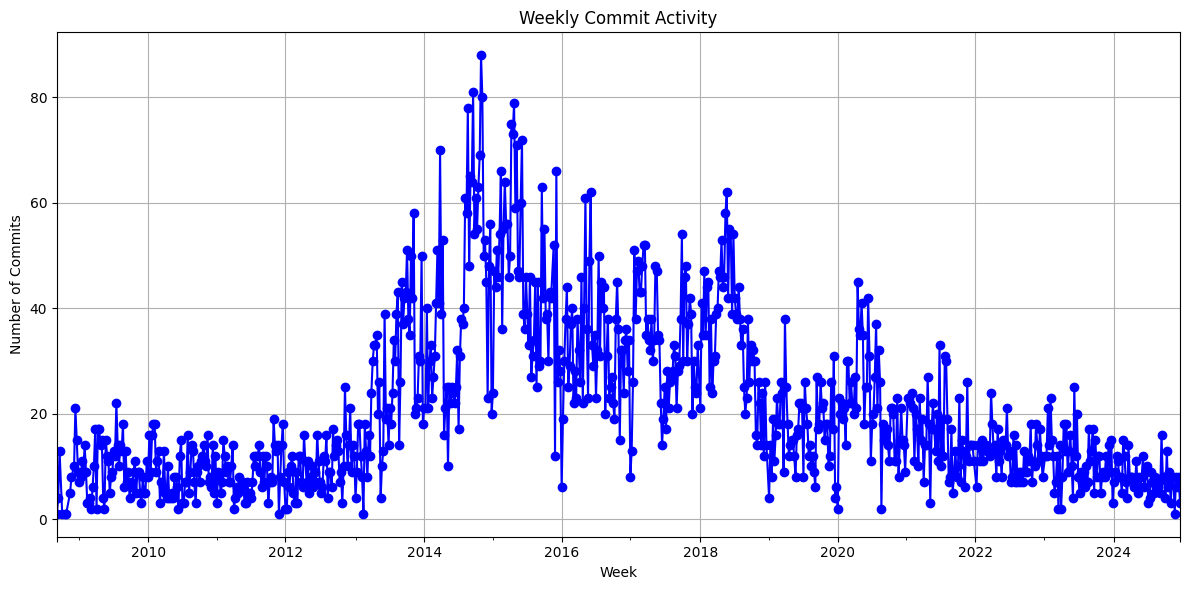

In [15]:
import git
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.api.types import is_datetime64_any_dtype as is_datetime


# Function to ensure all datetimes are in the correct timezone
def ensure_datetime(series: pd.Series, timezone: str) -> pd.Series:
    """
    Ensures that the `series` is a datetime series of dtype datetime64[ns, timezone].

    - Convert tz aware values to `timezone`.
    - Assume naive values are on `timezone` and make them aware.
    - Handle None values and convert them to NaT (so we can accomplish the dtype requirement).
    """
    if series.dtype == pd.DatetimeTZDtype(tz=timezone):
        return series

    are_datetime = series.apply(lambda x: isinstance(x, datetime)).astype(bool)

    # Convert only values that are not already datetime, otherwise if there are
    # tz-aware values pandas will raise: Tz-aware datetime.datetime cannot
    # be converted to datetime64 unless utc=True.
    series = series.mask(
        ~are_datetime, pd.to_datetime(series[~are_datetime], errors="coerce")
    )

    # Localize naive values to `timezone`
    are_unaware = series.apply(lambda x: not pd.isna(x) and x.tzinfo is None).astype(
        bool
    )
    series = series.mask(
        are_unaware, pd.to_datetime(series[are_unaware]).dt.tz_localize(timezone)
    )

    # Now that we don't have any naive value we can normalize all to UTC and
    # then convert to `timezone`.
    series = pd.to_datetime(series, utc=True).dt.tz_convert(timezone)

    return series


# Initialize the Git repository
repo_path = "./hive"  # Path to the cloned repository
repo = git.Repo(repo_path)

# Get commit data from the 'master' branch (or use the correct branch name)
commits = list(repo.iter_commits('master'))  # Replace 'master' with the correct branch name if needed

# Extract commit dates
commit_data = [(commit.committed_datetime, commit.hexsha) for commit in commits]

# Create a DataFrame
df = pd.DataFrame(commit_data, columns=['Date', 'Commit'])

# Ensure that 'Date' column is timezone-aware and converted to the desired timezone (UTC in this case)
df['Date'] = ensure_datetime(df['Date'], "UTC")

# Group by week and count commits
weekly_activity = df.groupby(df['Date'].dt.to_period('W')).size()

# Plot the time-series trends
plt.figure(figsize=(12, 6))
weekly_activity.plot(kind='line', color='blue', marker='o')
plt.title("Weekly Commit Activity")
plt.xlabel("Week")
plt.ylabel("Number of Commits")
plt.grid(True)
plt.tight_layout()
plt.show()

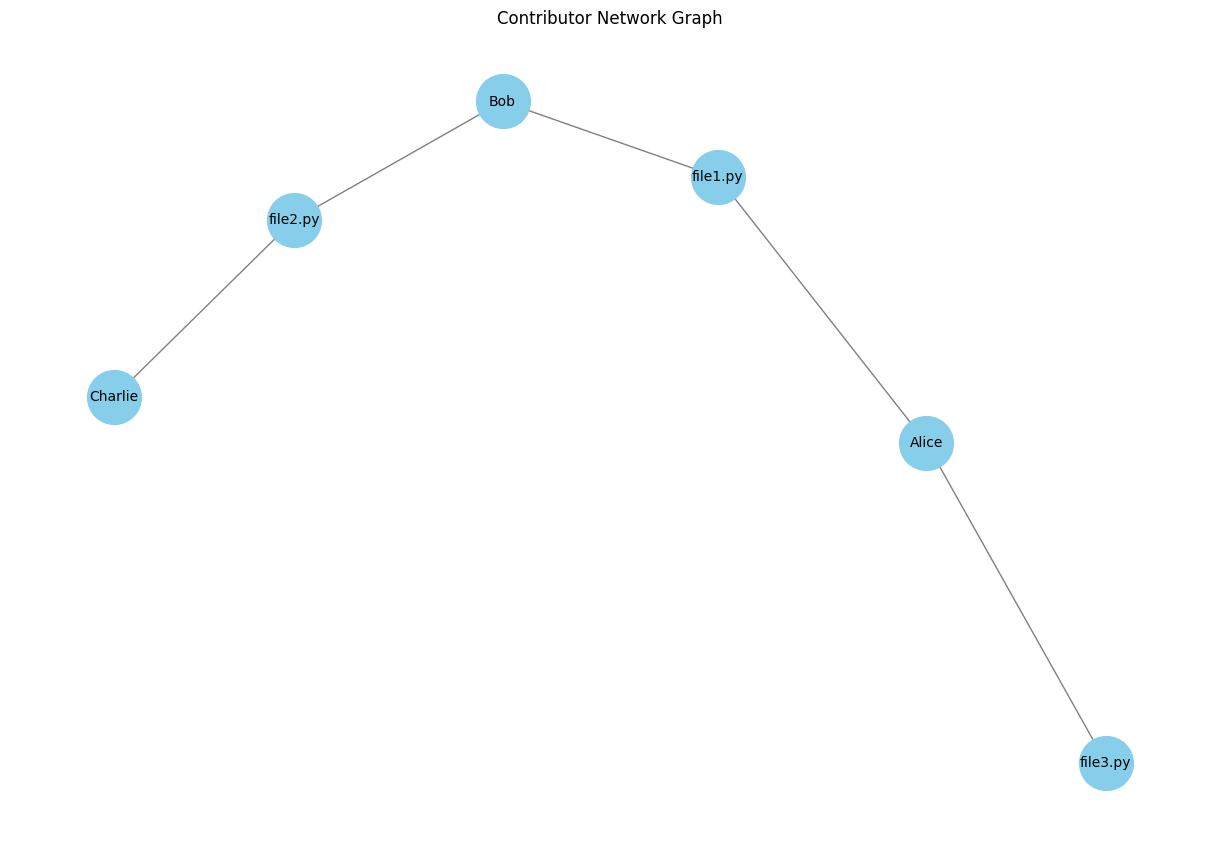

In [16]:
import networkx as nx

# Placeholder for example data (replace with your real file-author data)
# Simulate data: Each tuple represents (file, author)
file_author_data = [
    ("file1.py", "Alice"),
    ("file2.py", "Bob"),
    ("file1.py", "Bob"),
    ("file3.py", "Alice"),
    ("file2.py", "Charlie"),
]

# Create the graph
G = nx.Graph()
for file, author in file_author_data:
    G.add_edge(file, author)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=1500, edge_color="gray", font_size=10)
plt.title("Contributor Network Graph")
plt.show()

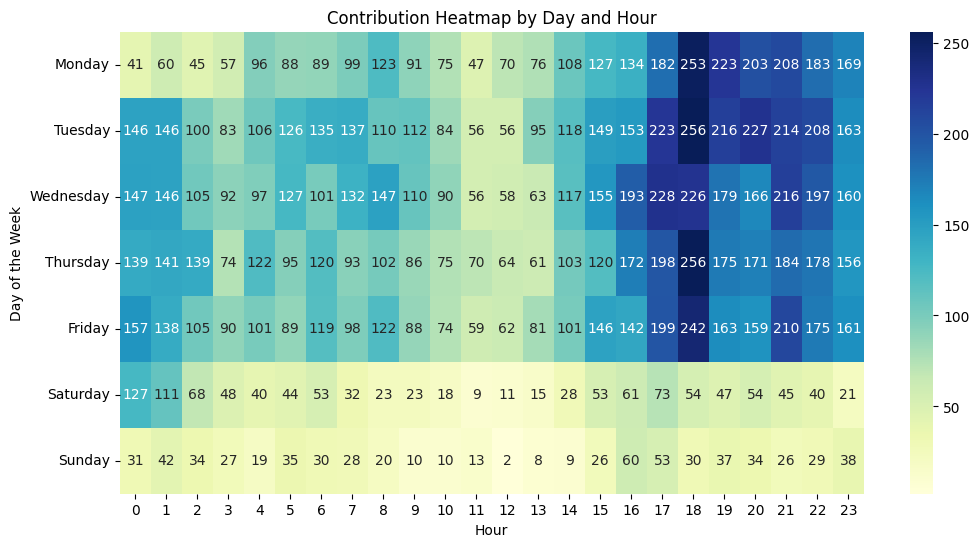

In [17]:
import seaborn as sns
import numpy as np

# Extract day and hour from the 'Date' column
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# Create a pivot table of contributions by day and hour
heatmap_data = df.pivot_table(index='Day', columns='Hour', aggfunc='size', fill_value=0)

# Reorder days for better visualization
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Contribution Heatmap by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Day of the Week")
plt.show()